**Loai Gamal Mohamed         20180206**
**Ahmed Kadry Abd El-Shafy   20180018**

In [1]:
import keras
from keras import layers

In [2]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(8, (5, 5), activation='relu', padding='same')(input_img)

y = layers.MaxPooling2D((2, 2), padding='same')(x)

conv = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(y)

encoded = layers.MaxPooling2D((2, 2), padding='same')(conv)
encoded_weights = encoded.shape

print(y.shape)
print(encoded_weights)

(None, 14, 14, 8)
(None, 7, 7, 12)


In [3]:
x = layers.UpSampling2D((2, 2))(encoded)
conv = layers.Conv2D(12, (3, 3), activation='sigmoid', padding='same')(x)
y = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(y)

print(x.shape)
print(y.shape)
print(decoded.shape)


autoencoder = keras.Model(input_img, decoded)

(None, 14, 14, 12)
(None, 28, 28, 12)
(None, 28, 28, 1)


In [4]:
encoder = keras.Model(input_img, encoded)
print(encoder.layers)

[<keras.engine.input_layer.InputLayer object at 0x7fa9febaa510>, <keras.layers.convolutional.Conv2D object at 0x7fa9febbaad0>, <keras.layers.pooling.MaxPooling2D object at 0x7faa79ef0990>, <keras.layers.convolutional.Conv2D object at 0x7fa9feb6e650>, <keras.layers.pooling.MaxPooling2D object at 0x7fa9feb6e7d0>]


In [5]:
encoded_input = keras.Input(shape=(7, 7, 12))
x = autoencoder.layers[-3](encoded_input)
conv_hidden = autoencoder.layers[-2](x)
y = autoencoder.layers[-1](conv_hidden)
decoded_out = autoencoder.layers[0](y)
decoder = keras.Model(encoded_input, decoded_out)

print(decoder.layers)
print(conv_hidden.shape)
print(x.shape)
print(y.shape)
print(decoded_out.shape)

[<keras.engine.input_layer.InputLayer object at 0x7fa9f05540d0>, <keras.layers.convolutional.UpSampling2D object at 0x7fa9feaccc50>, <keras.layers.convolutional.UpSampling2D object at 0x7fa9feacc690>, <keras.layers.convolutional.Conv2D object at 0x7fa9febba310>, <keras.engine.input_layer.InputLayer object at 0x7fa9febaa510>]
(None, 28, 28, 12)
(None, 14, 14, 12)
(None, 28, 28, 1)
(None, 28, 28, 1)


In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 12)        876       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 12)         0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 12)       0     

In [7]:
from keras.datasets import mnist
import numpy as np

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_test.shape)
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10, #5, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 35s 10ms/step - loss: 0.2021 - val_loss: 0.1143
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1093 - val_loss: 0.1047
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1042 - val_loss: 0.1020
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1022 - val_loss: 0.1004
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1008 - val_loss: 0.0993
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0998 - val_loss: 0.0984
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0990 - val_loss: 0.0978
Epoch 8/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0984 - val_loss: 0.0973
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0980 - val_loss: 0.0969
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0976 - val_loss: 0.0

In [10]:
encode_imgs = encoder.predict(x_test)
decode_imgs = decoder.predict(encode_imgs)

[9559, 5347, 5658, 892, 7172, 9115, 1271, 3492, 632, 9249]


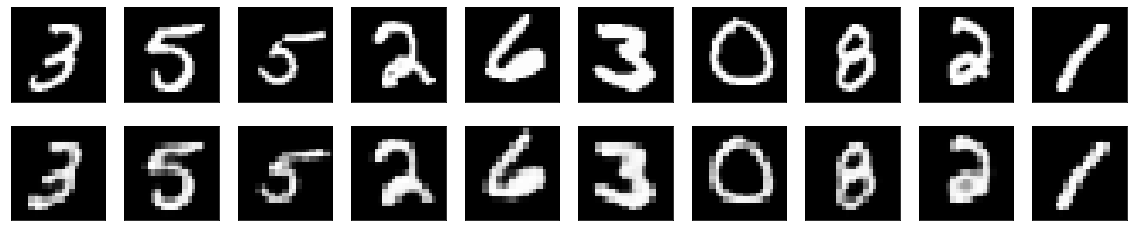

In [27]:
import matplotlib.pyplot as plt
import random

k = 10
num_list = random.sample(range(0, 10000-1), k)
print(num_list)
plt.figure(figsize=(20, 4))
for i in range(1, k + 1):
    # Display original
    ax = plt.subplot(2, k, i)
    plt.imshow(x_test[num_list[i-1]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # Display reconstruction
    ax = plt.subplot(2, k, i + k)
    plt.imshow(decode_imgs[num_list[i-1]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

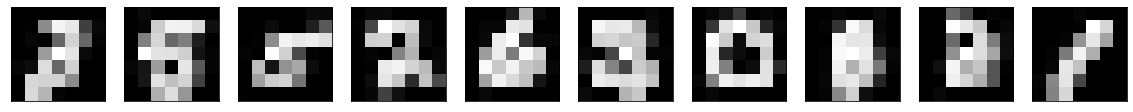

In [28]:
k = 10
plt.figure(figsize=(20, 8))
for i in range(1, k + 1):
    ax = plt.subplot(1, k, i)
    plt.imshow(encode_imgs[num_list[i-1],:,:,4].reshape((7 , 7)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

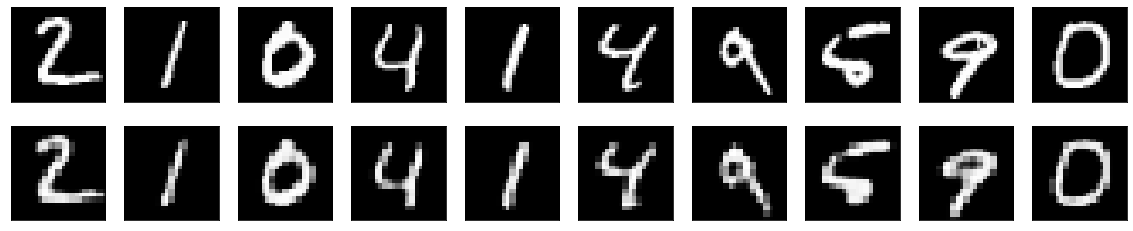

In [29]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

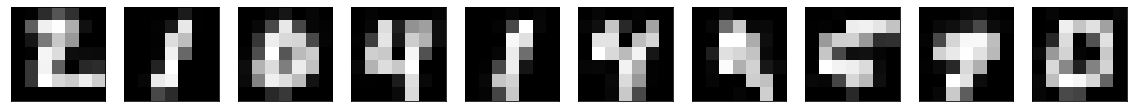

In [30]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encode_imgs[i,:,:,4].reshape((7 , 7)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()